# Loading

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.colors as mcolors

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/customer-churn-rate/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df = df.drop(columns=['RowNumber', 'Surname', 'CustomerId'])

In [5]:
df.columns = [
    'credit_score',
    'geography',
    'gender',
    'age',
    'tenure',
    'balance',
    'num_of_products',
    'has_cr_card',
    'is_active_member',
    'estimated_salary',
    'exited'
]

In [6]:
df.duplicated().sum()

0

In [7]:
df.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['has_cr_card'][df['has_cr_card'] == 0] = 'No Cr Card'
df['has_cr_card'][df['has_cr_card'] == 1] = 'Has Cr Card'
df['is_active_member'][df['is_active_member'] == 1] = 'Active'
df['is_active_member'][df['is_active_member'] == 0] = 'Inactive'
df['exited'][df['exited'] == 0] = 'Not Churn'
df['exited'][df['exited'] == 1] = 'Churn'
df_cat = df.select_dtypes(include='object')
df_num = df.select_dtypes(exclude='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  object 
 8   is_active_member  10000 non-null  object 
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


# EDA

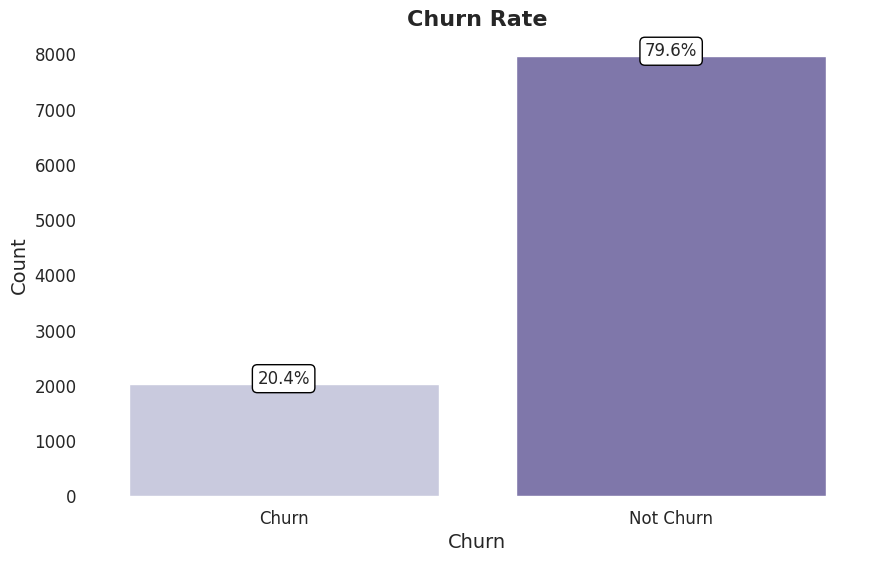

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='exited', palette='Purples')
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Churn Rate', fontsize=16, fontweight='bold')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.2,
            '{:1.1f}%'.format((height / total) * 100),
            ha="center",
            fontsize=12,
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', linewidth=1))
plt.grid(False)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
sns.despine(left=True, bottom=True)
plt.show()

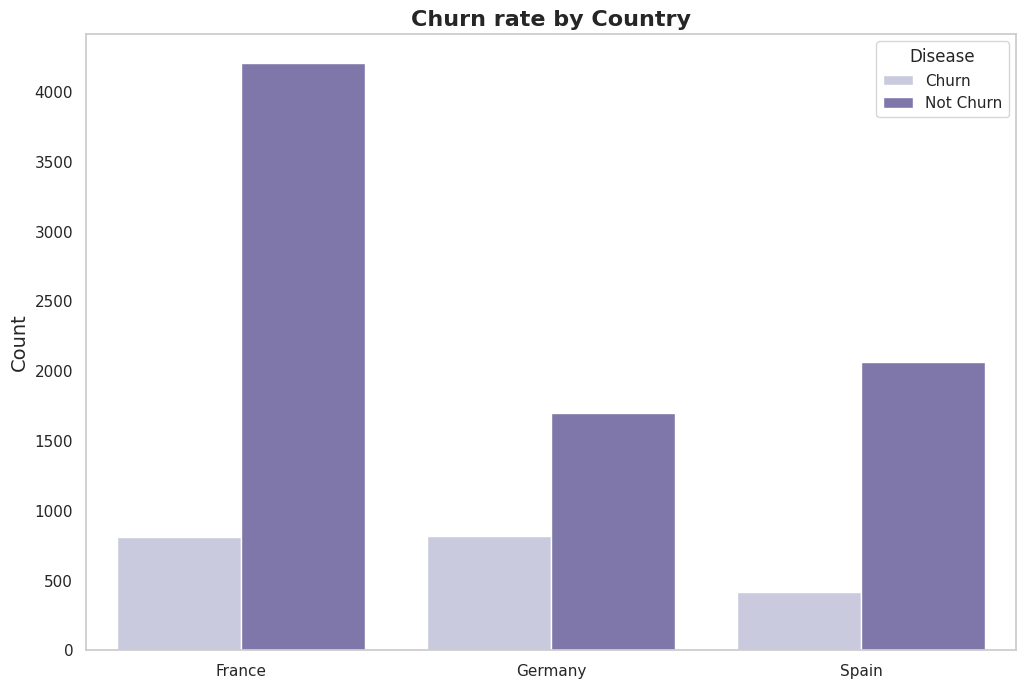

In [11]:
grouped_data = df.groupby(['geography', 'exited']).size().reset_index(name='count')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=grouped_data,
                      x='geography',
                      y='count',
                      hue='exited',
                      palette='Purples',
                      dodge=True)
plt.grid(False)
plt.title('Churn rate by Country', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Count', fontsize=14)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, labels, title='Disease')
plt.show()

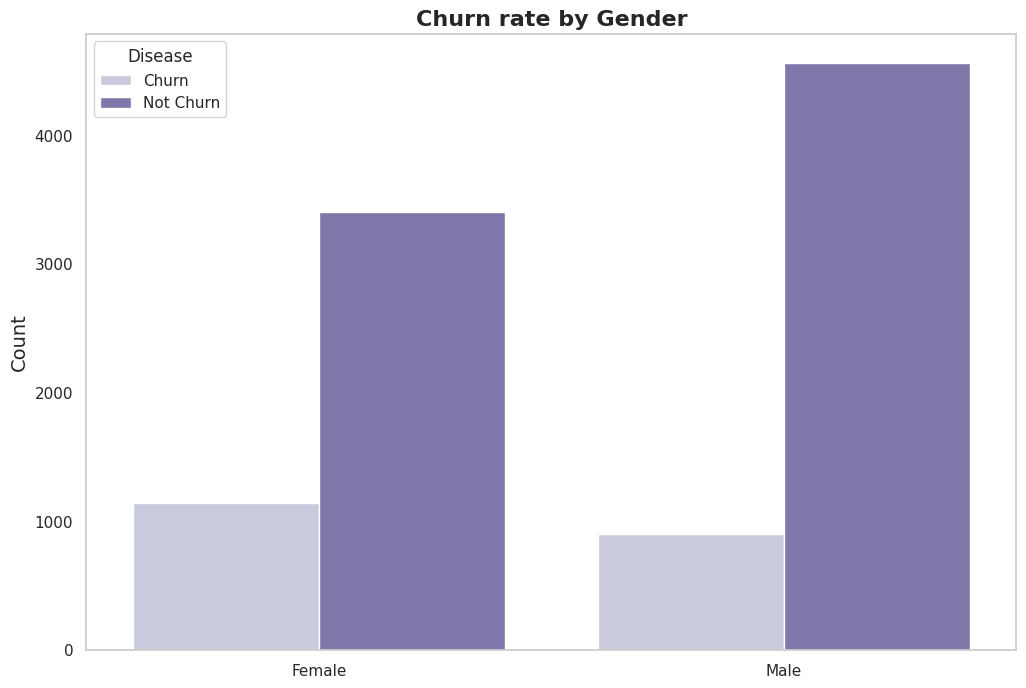

In [12]:
grouped_data = df.groupby(['gender', 'exited']).size().reset_index(name='count')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=grouped_data,
                      x='gender',
                      y='count',
                      hue='exited',
                      palette='Purples',
                      dodge=True)
plt.grid(False)
plt.title('Churn rate by Gender', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Count', fontsize=14)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, labels, title='Disease')
plt.show()

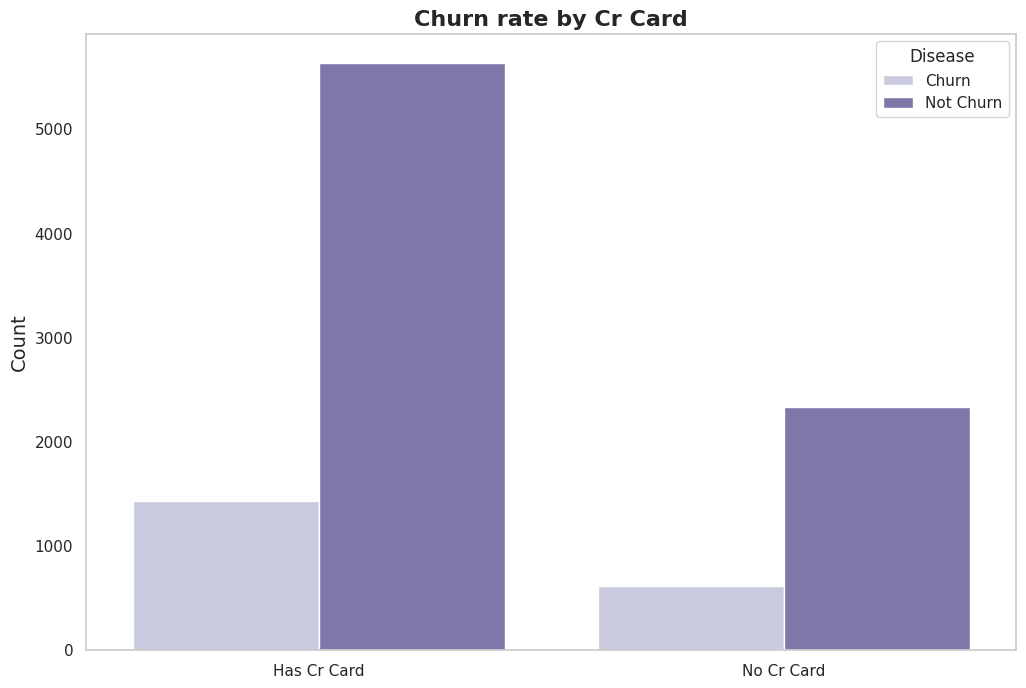

In [13]:
grouped_data = df.groupby(['has_cr_card', 'exited']).size().reset_index(name='count')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=grouped_data,
                      x='has_cr_card',
                      y='count',
                      hue='exited',
                      palette='Purples',
                      dodge=True)
plt.grid(False)
plt.title('Churn rate by Cr Card', fontsize=16, fontweight='bold')
plt.xlabel('', fontsize=14)
plt.ylabel('Count', fontsize=14)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, labels, title='Disease')
plt.show()

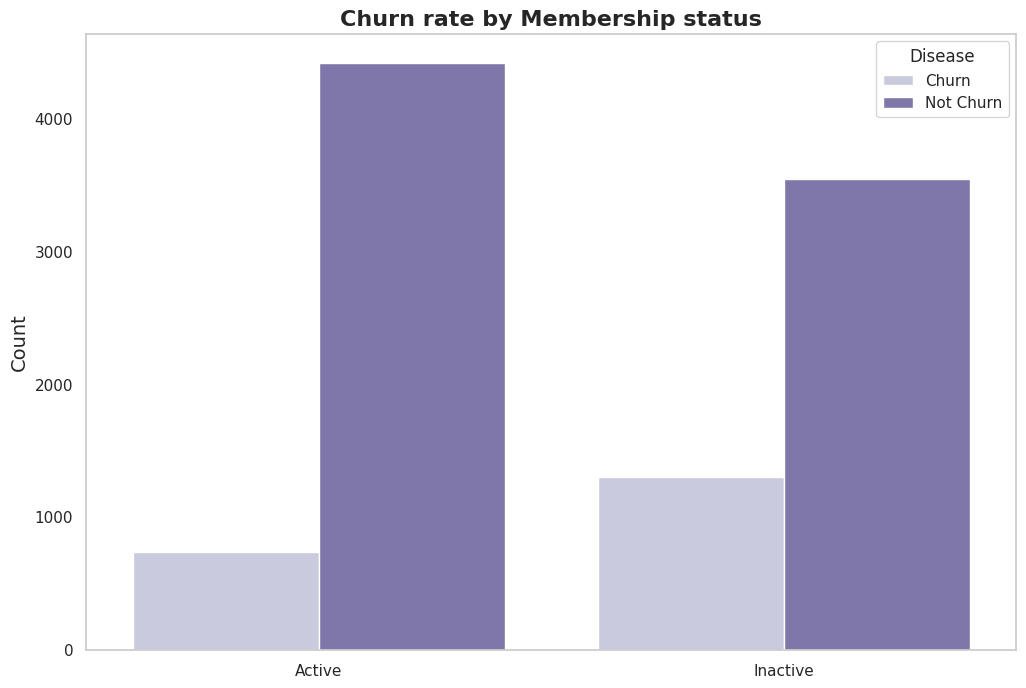

In [14]:
grouped_data = df.groupby(['is_active_member', 'exited']).size().reset_index(name='count')
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=grouped_data,
                      x='is_active_member',
                      y='count',
                      hue='exited',
                      palette='Purples',
                      dodge=True)
plt.title('Churn rate by Membership status', fontsize=16, fontweight='bold')
plt.grid(False)
plt.xlabel('', fontsize=14)
plt.ylabel('Count', fontsize=14)
handles, labels = barplot.get_legend_handles_labels()
plt.legend(handles, labels, title='Disease')
plt.show()

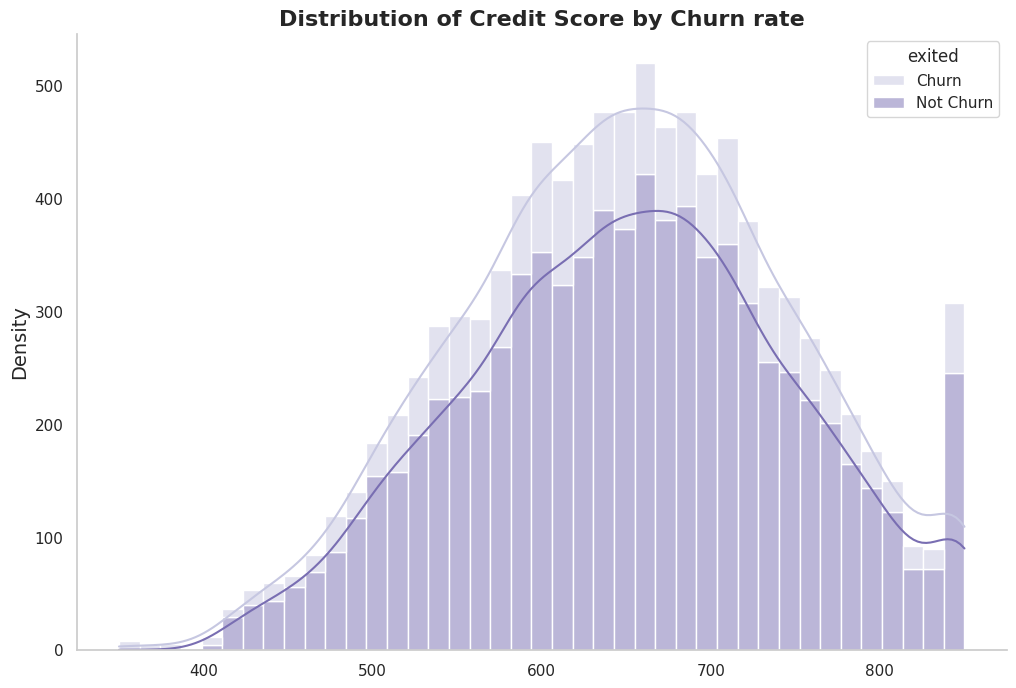

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='credit_score', hue='exited', kde=True, palette='Purples', multiple='stack')
plt.xlabel('', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Credit Score by Churn rate', fontsize=16, fontweight='bold')
sns.despine(right=True)
plt.grid(False)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  object 
 8   is_active_member  10000 non-null  object 
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


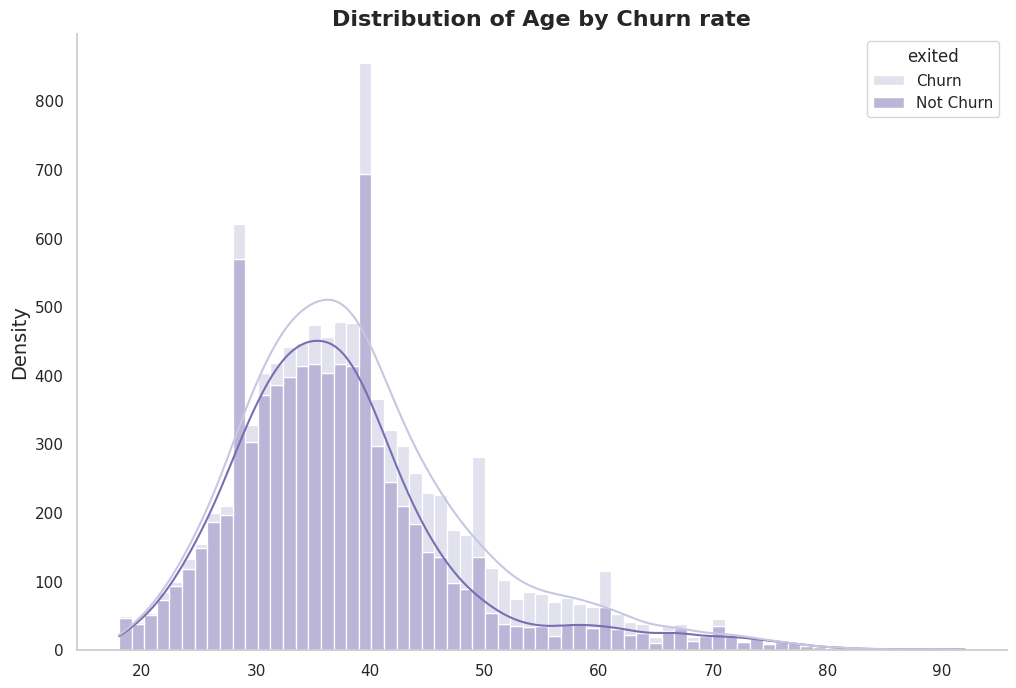

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='age', hue='exited', kde=True, palette='Purples', multiple='stack')
plt.xlabel('', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Age by Churn rate', fontsize=16, fontweight='bold')
sns.despine(right=True)
plt.grid(False)
plt.show()

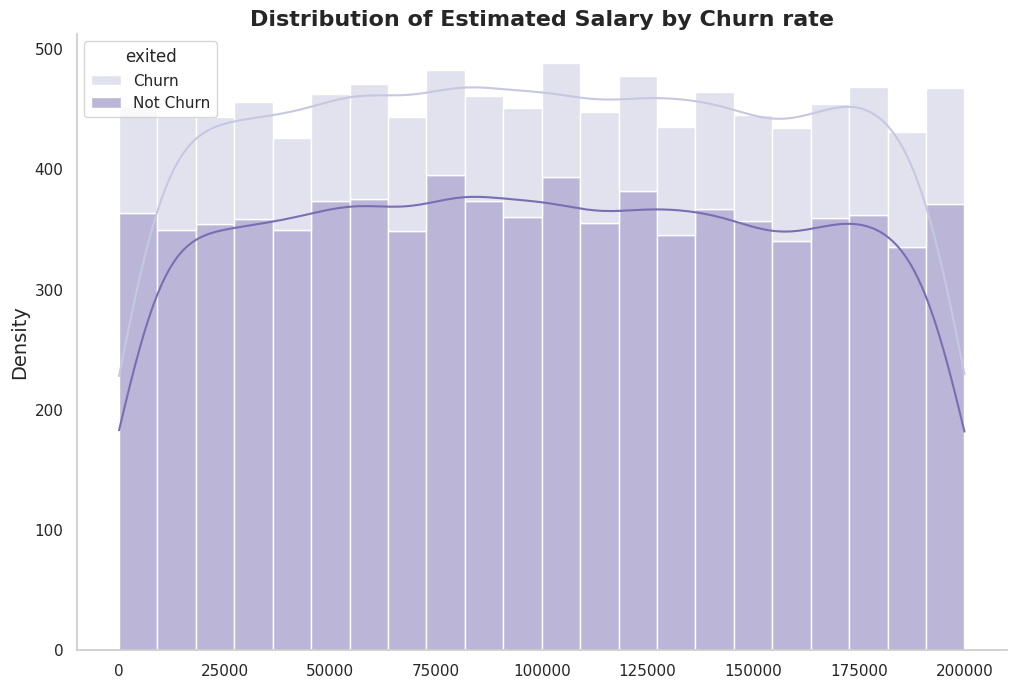

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='estimated_salary', hue='exited', kde=True, palette='Purples', multiple='stack')
plt.xlabel('', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Estimated Salary by Churn rate', fontsize=16, fontweight='bold')
sns.despine(right=True)
plt.grid(False)
plt.show()

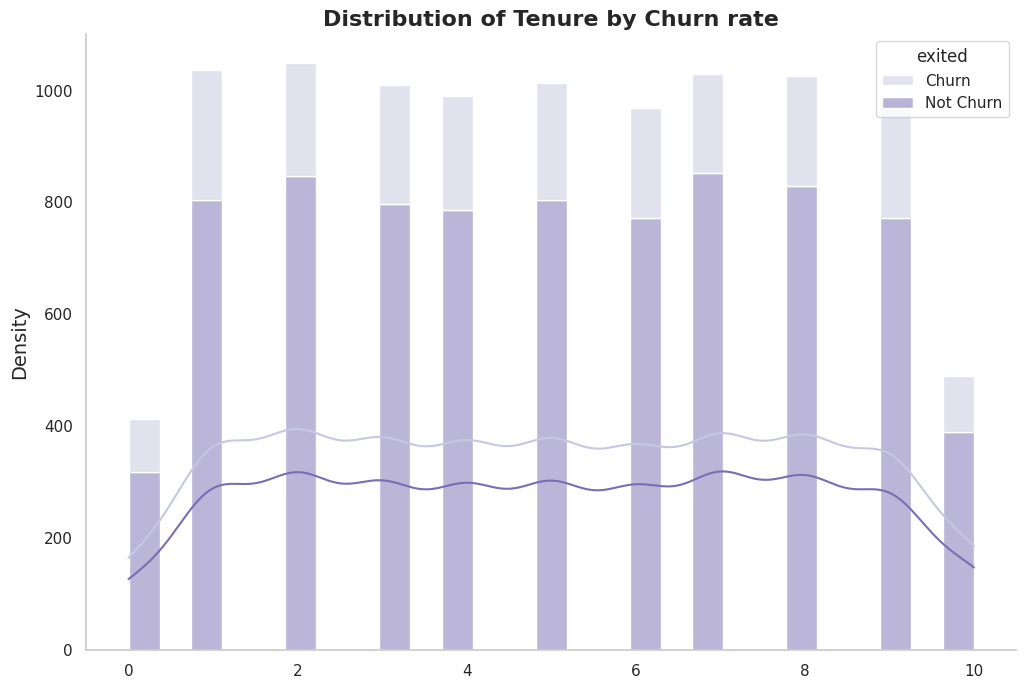

In [19]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='tenure', hue='exited', kde=True, palette='Purples', multiple='stack')
plt.xlabel('', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Tenure by Churn rate', fontsize=16, fontweight='bold')
sns.despine(right=True)
plt.grid(False)
plt.show()

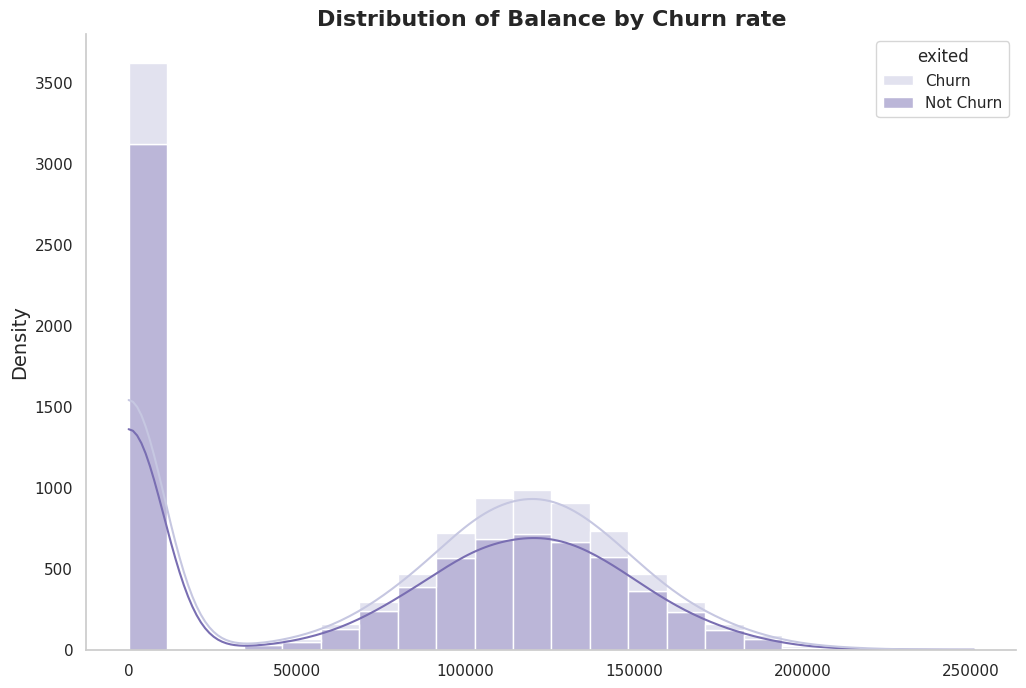

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='balance', hue='exited', kde=True, palette='Purples', multiple='stack')
plt.xlabel('', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Balance by Churn rate', fontsize=16, fontweight='bold')
sns.despine(right=True)
plt.grid(False)
plt.show()

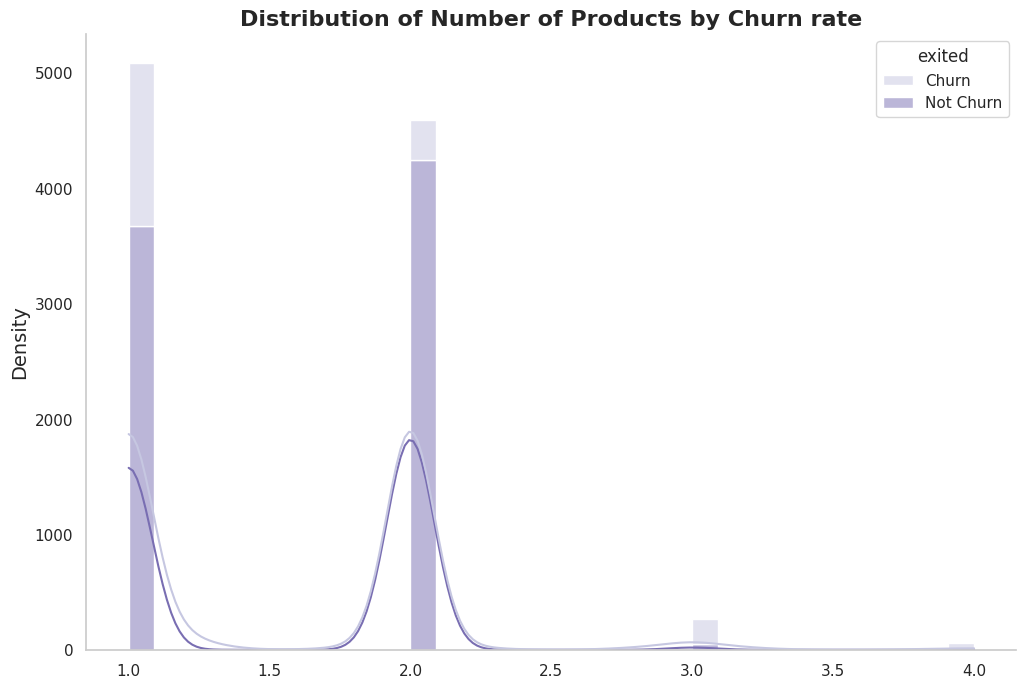

In [21]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='num_of_products', hue='exited', kde=True, palette='Purples', multiple='stack')
plt.xlabel('', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Number of Products by Churn rate', fontsize=16, fontweight='bold')
sns.despine(right=True)
plt.grid(False)
plt.show()

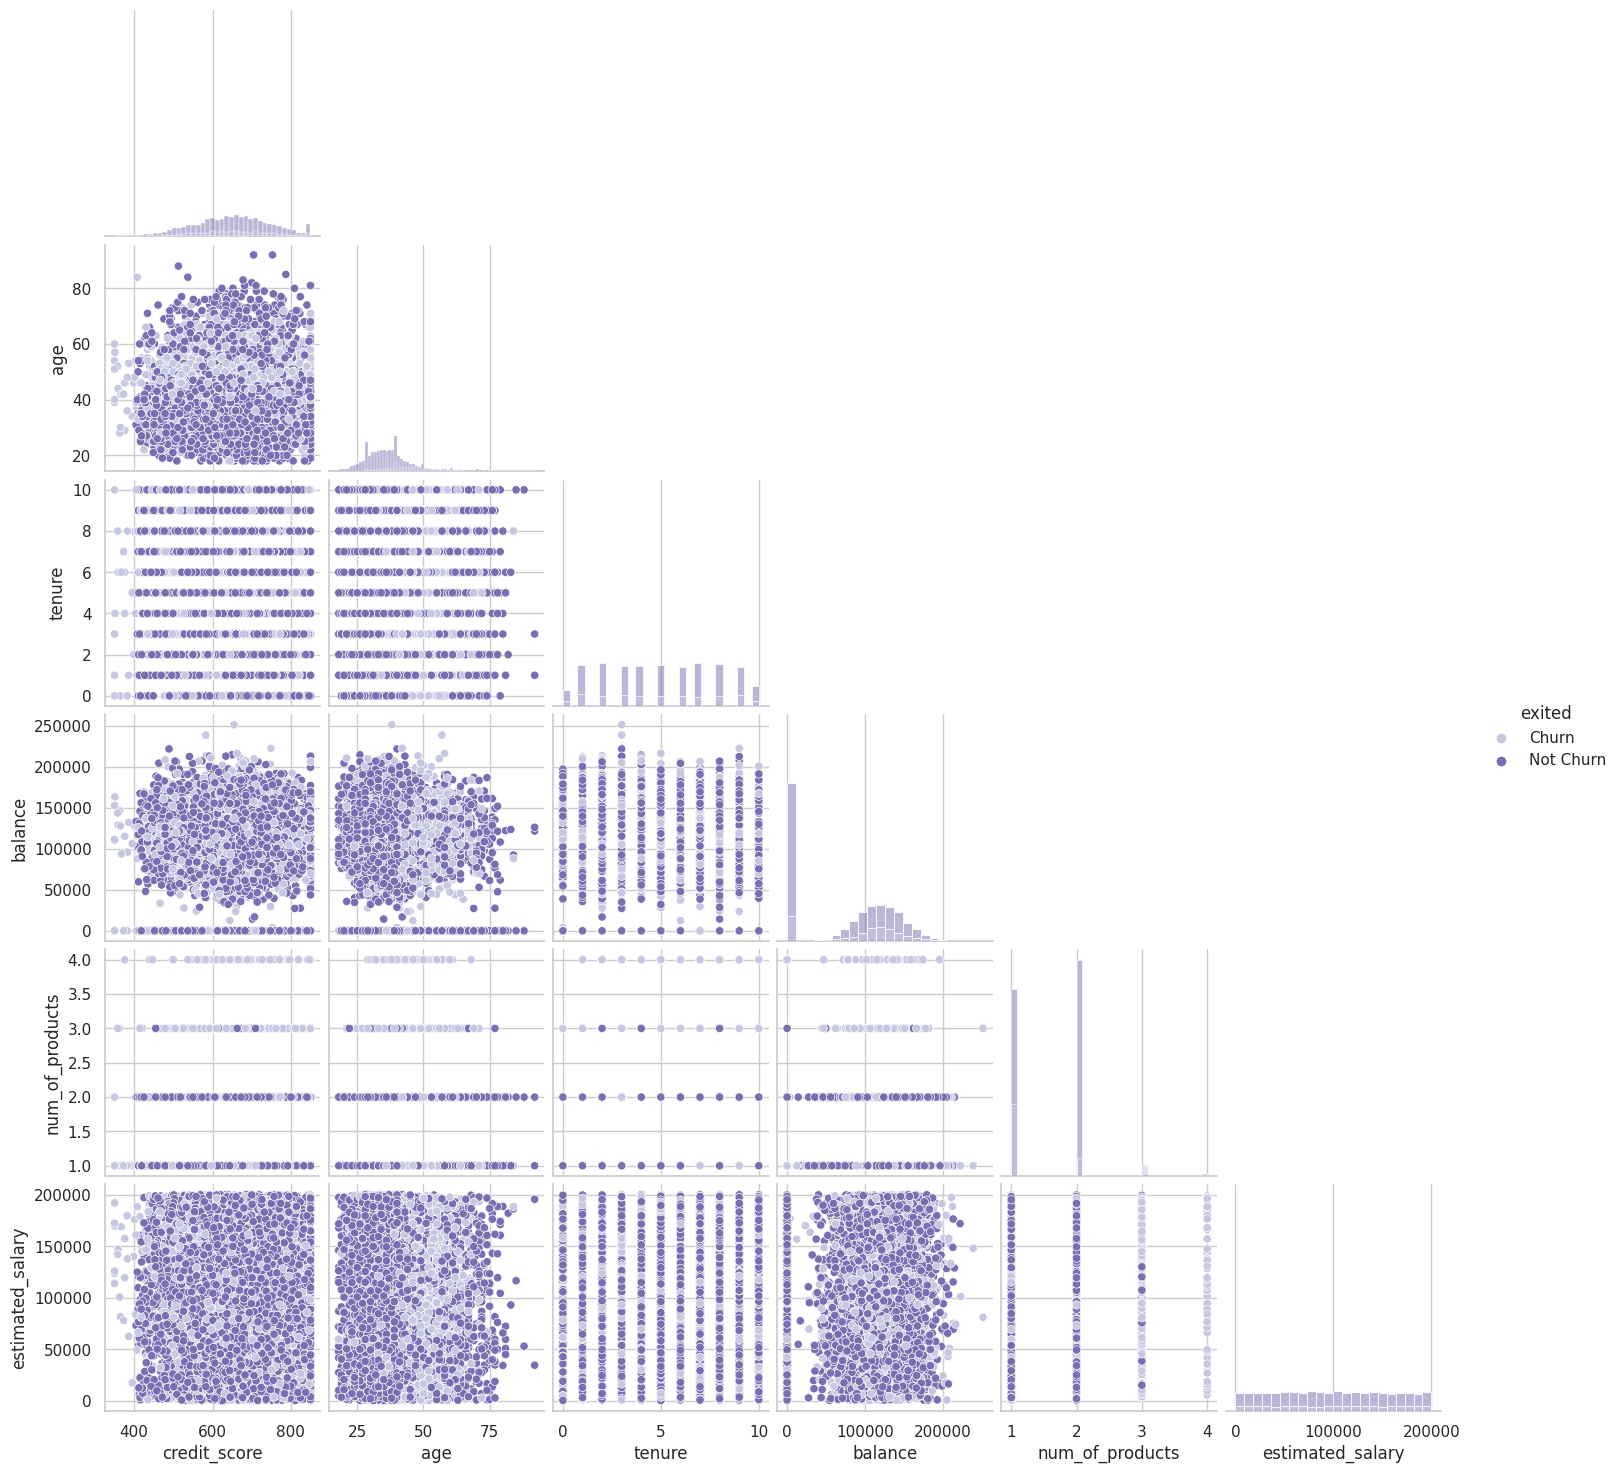

In [22]:
sns.pairplot(df, hue='exited', palette='Purples', corner=True, diag_kind='hist')
plt.show()

# Preprocessing

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  object 
 8   is_active_member  10000 non-null  object 
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 859.5+ KB


In [24]:
le = LabelEncoder()
columns_to_encode = ['geography', 'gender', 'has_cr_card', 'is_active_member'] 
for column in columns_to_encode:
    df[column] = le.fit_transform(df[column])

df['exited'] = df['exited'].map({'Not Churn': 0, 'Churn': 1})

In [25]:
X = df.drop('exited', axis=1)
y = df['exited']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X.shape, y.shape, X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10000, 10), (10000,), (8000, 10), (8000,), (2000, 10), (2000,))

# Machine Learning

In [27]:
def plot_conf_matrix(names, classifiers, nrows, ncols, fig_a, fig_b):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(fig_a, fig_b))
    i = 0
    for clf, ax in zip(classifiers, axes.flatten()):
        clf.fit(X_train, y_train)
        plot_confusion_matrix(clf, X_val, y_val, ax=ax)
        ax.title.set_text(names[i])
        i = i + 1
    plt.tight_layout()
    plt.show()
def roc_auc_curve(names, classifiers):
    plt.figure(figsize=(12, 8))
    for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        pred_proba = clf.predict_proba(X_val)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_val, pred_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=3, label= name +' ROC curve (area = %0.2f)' % (roc_auc))
        plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.0])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic (ROC) curves', fontsize=20)
        plt.legend(loc="lower right")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  int64  
 2   gender            10000 non-null  int64  
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


In [29]:
df.exited.value_counts()

exited
0    7963
1    2037
Name: count, dtype: int64

In [30]:
def label_encode_cat_features(df, cat_features):
    for feature in cat_features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df
cat_feats = ['geography', 'gender', 'has_cr_card', 'is_active_member', 'exited']
df = label_encode_cat_features(df, cat_feats)

X = df.drop('exited', axis=1)
y = df['exited']

y = y.values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"X.shape: {X.shape}")
print(f"y.shape: {y.shape}")
print(f"X_train.shape: {X_train.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"X_val.shape: {X_val.shape}")
print(f"y_val.shape: {y_val.shape}")

seed = 0

names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Support Vectors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Quadratic DA',
    'Neural Net'
]

classifiers = [
    LogisticRegression(solver="liblinear", random_state=seed),
    KNeighborsClassifier(2),
    SVC(probability=True, random_state=seed),
    DecisionTreeClassifier(random_state=seed),
    RandomForestClassifier(random_state=seed),
    AdaBoostClassifier(random_state=seed),
    GradientBoostingClassifier(random_state=seed),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    MLPClassifier(random_state=seed),
]

def score_summary(names, classifiers):
    results = []
    for name, clf in zip(names, classifiers):
        try:
            clf.fit(X_train, y_train)
            pred = clf.predict(X_val)

            accuracy = accuracy_score(y_val, pred)
            recall = recall_score(y_val, pred, average='binary')
            precision = precision_score(y_val, pred, average='binary')
            f1 = f1_score(y_val, pred, average='binary')

            roc_auc = float('nan')
            if hasattr(clf, "predict_proba"):
                pred_proba = clf.predict_proba(X_val)
                roc_auc = roc_auc_score(y_val, pred_proba[:, 1])

            results.append({
                'Classifier': name,
                'Accuracy': accuracy,
                'Recall': recall,
                'Precision': precision,
                'F1': f1,
                'ROC_AUC': roc_auc
            })
        except Exception as e:
            print(f"Error with classifier {name}: {e}")
            results.append({
                'Classifier': name,
                'Accuracy': float('nan'),
                'Recall': float('nan'),
                'Precision': float('nan'),
                'F1': float('nan'),
                'ROC_AUC': float('nan')
            })

    return pd.DataFrame(results)

summary = score_summary(names, classifiers)
summary = summary.sort_values(by='Accuracy', ascending=False)

styled_summary = summary.style.background_gradient(cmap='coolwarm', subset=['Accuracy'])\
    .bar(subset=["ROC_AUC"], color='#6495ED')\
    .bar(subset=["Recall"], color='#ff355d')\
    .bar(subset=["Precision"], color='lightseagreen')\
    .bar(subset=["F1"], color='gold')

styled_summary

X.shape: (10000, 10)
y.shape: (10000,)
X_train.shape: (8000, 10)
y_train.shape: (8000,)
X_val.shape: (2000, 10)
y_val.shape: (2000,)


,Classifier,Accuracy,Recall,Precision,F1,ROC_AUC
4,Random Forest,0.865000,0.506173,0.745455,0.602941,0.869527
6,Gradient Boosting,0.865000,0.498765,0.750929,0.599407,0.870760
5,AdaBoost,0.861500,0.535802,0.709150,0.610408,0.854205
8,Quadratic DA,0.840000,0.318519,0.745665,0.446367,0.824564
2,Support Vectors,0.797500,0.000000,0.000000,0.000000,0.517989
9,Neural Net,0.797500,0.007407,0.500000,0.014599,0.438831
0,Logistic Regression,0.787000,0.069136,0.363636,0.116183,0.675587
3,Decision Tree,0.786500,0.545679,0.476293,0.508631,0.696664
7,Naive Bayes,0.784000,0.086420,0.360825,0.139442,0.752210
1,Nearest Neighbors,0.773500,0.056790,0.244681,0.092184,0.500457


The results of the different classifiers for a churn model show that Gradient Boosting and Random Forests are the best models, achieving 86.5% and 86.45%. Both models also show strong recall, precision, F1 scores, and ROC AUC values, indicating to their robustness in correctly identifying both churn and non-churn customers. AdaBoost also did well with an accuracy of 86.15% and balanced performance across other metrics.
Overall, ensemble methods, particularly Gradient boosting and Random forests, are recommended for this churn prediction model.

# Model Tuning

## GradientBoostingClassifier

In [31]:
param_grid = {
    'n_estimators': [10, 50],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [5, 10, 20]
}

gb = GradientBoostingClassifier(random_state=0)

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

best_gb = grid_search.best_estimator_
y_pred = best_gb.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy on training set: {best_gb.score(X_train, y_train):.3f}")
print(f"Accuracy on validation set: {best_gb.score(X_val, y_val):.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=10; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=5, min_samples_split=5, n_estimators=50; tota

## AdaBoostClassifier

In [32]:
param_grid = {
   'n_estimators': [10, 50],
    'learning_rate': [0.01, 0.1],
    'estimator__max_depth': [3, 4, 5],
    'estimator__min_samples_split': [5, 10, 20],
    'estimator__min_samples_leaf': [5, 10, 20]
}

base_estimator = DecisionTreeClassifier(random_state=0)
ada_boost = AdaBoostClassifier(estimator=base_estimator, algorithm='SAMME', random_state=0)

grid_search = GridSearchCV(estimator=ada_boost, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

best_ada_boost = grid_search.best_estimator_
y_pred = best_ada_boost.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy on training set: {best_ada_boost.score(X_train, y_train):.3f}")
print(f"Accuracy on validation set: {best_ada_boost.score(X_val, y_val):.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END estimator__max_depth=3, estimator__min_samples_leaf=5, estimator__min_samples_split=5, learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END estimator__max_depth=3, estimator__min_samples_leaf=5, estimator__min_samples_split=5, learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END estimator__max_depth=3, estimator__min_samples_leaf=5, estimator__min_samples_split=5, learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END estimator__max_depth=3, estimator__min_samples_leaf=5, estimator__min_samples_split=5, learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END estimator__max_depth=3, estimator__min_samples_leaf=5, estimator__min_samples_split=5, learning_rate=0.01, n_estimators=10; total time=   0.2s
[CV] END estimator__max_depth=3, estimator__min_samples_leaf=5, estimator__min_samples_split=5, learning_rate=0.01, n_estimators=50; total time=   0.9s
[CV] END estimator__max_d

## RandomForestClassifier

In [33]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=0)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy on training set: {best_rf.score(X_train, y_train):.3f}")
print(f"Accuracy on validation set: {best_rf.score(X_val, y_val):.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END bootstrap=True, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END boots

# Final Model

In [34]:
best_params = {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

rf = RandomForestClassifier(bootstrap=best_params['bootstrap'], max_depth=best_params['max_depth'], n_estimators=best_params['n_estimators'],min_samples_leaf=best_params['min_samples_leaf'],min_samples_split=best_params['min_samples_split']  )
rf.fit(X_train, y_train)

y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_val)

print("Best parameters found: ", grid_search.best_params_)
print("Best score achieved: ", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_val)

conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f"Accuracy on training set: {best_rf.score(X_train, y_train):.3f}")
print(f"Accuracy on validation set: {best_rf.score(X_val, y_val):.3f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

comparison_df = pd.DataFrame({
    'Actual': y_val,
    'Predicted': y_test_pred,
    'Difference': y_test_pred - y_val,
})

comparison_df

Best parameters found:  {'bootstrap': True, 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best score achieved:  0.858
Accuracy on training set: 0.868
Accuracy on validation set: 0.867
Confusion Matrix:
[[1549   46]
 [ 221  184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.80      0.45      0.58       405

    accuracy                           0.87      2000
   macro avg       0.84      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



,Actual,Predicted,Difference
0,0,0,0
1,1,0,-1
2,0,0,0
3,0,0,0
4,0,0,0
...,...,...,...
1995,0,0,0
1996,0,0,0
1997,0,0,0
1998,0,0,0


# Predictor

In [35]:
df.head(1)

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
0,619,0,0,42,2,0.0,1,0,0,101348.88,1


In [36]:
best_rf.predict(([(619,	0,	0,	42,	2,	0.00,	1,	0,	0,	101348.88)]))

array([0])

In [37]:
best_rf.predict(([(608,	2,	0,	41,	1,	83807.86,	1,	1,	0,	112542.58)]))

array([0])